# Polymer Structure Predictor (PSP)
Polymer Structure Predictor (PSP) is an autonomous model generator that builds a hierarchy of polymer models from SMILES strings, ranging from monomers, linear and loop oligomers, infinite polymer chains, to crystal and amorphous structures. The flexibility to define parameters allows for the construction of desired models at a reasonable computational cost. Individual output models can be visualized and used to perform *ab initio* and molecular dynamics simulations. 

In this tutorial, we will cover:
- Instation of PSP and dependencies
- Examples for building polymer models
	- $MoleculeBuilder$ (Linear and circular oligomers)
	- $ChainBuilder$ (Finite and infinite polymer chains [*periodic*])
	- $CrystalBuilder$ (Crystal models for small molecules and polymers)
	- $AmorphousBuilder$ (Amorphous structures)

> The user can save a copy of this notebook to Google Drive or download it using the **File** tab (top left) for later use.

# Install PSP and dependencies

- Miniconda
- Scipy (v1.7.3)
- Open Babel (v3.1.1)
- RDKit (v2020.09.1.0)
- Packmol (v20.3.1)
- PySIMM (v1.1)
- py3Dmol (v1.7.0)
- Ambertools (v3.1.1)
- PSP (v0.1.0)

## Install Miniconda
Miniconda is a free minimal installer for conda. For more details visit https://docs.conda.io/en/latest/miniconda.html.

### Download the installer script
The following code downloads the suitable Miniconda installer script.

In [ ]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.10.3-Linux-x86_64.sh
!chmod +x Miniconda3-py37_4.10.3-Linux-x86_64.sh

--2022-11-17 16:48:01--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.10.3-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89026327 (85M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.10.3-Linux-x86_64.sh’

Miniconda3-py37_4.1 100%[===================>]  84.90M   233MB/s    in 0.4s    

2022-11-17 16:48:01 (233 MB/s) - ‘Miniconda3-py37_4.10.3-Linux-x86_64.sh’ saved [89026327/89026327]



### Unset the *PYTHONPATH* variable
It is recommended that you clear the PYTHONPATH environment variable prior to installing Miniconda. Otherwise, it may cause problems if the packages installed and accessible via the PYTHONPATH directories are incompatible with the Python version included with Miniconda. 

In [ ]:
%env PYTHONPATH=

env: PYTHONPATH=


### Install Miniconda 
The code below will install Miniconda into */usr/local*.

In [ ]:
!./Miniconda3-py37_4.10.3-Linux-x86_64.sh -b -f -p /usr/local

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2021.7.5=h06a4308_1
    - certifi==2021.5.30=py37h06a4308_0
    - cffi==1.14.6=py37h400218f_0
    - chardet==4.0.0=py37h06a4308_1003
    - conda-package-handling==1.7.3=py37h27cfd23_1
    - conda==4.10.3=py37h06a4308_0
    - cryptography==3.4.7=py37hd23ed53_0
    - idna==2.10=pyhd3eb1b0_0
    - ld_impl_linux-64==2.35.1=h7274673_9
    - libffi==3.3=he6710b0_2
    - libgcc-ng==9.3.0=h5101ec6_17
    - libgomp==9.3.0=h5101ec6_17
    - libstdcxx-ng==9.3.0=hd4cf53a_17
    - ncurses==6.2=he6710b0_1
    - openssl==1.1.1k=h27cfd23_0
    - pip==21.1.3=py37h06a4308_0
    - pycosat==0.6.3=py37h27cfd23_0
    - pycparser==2.20=py_2
    - pyopenssl==20.0.1=pyhd3eb1b0_1
    - pysocks==1.7.1=py37_1
    - python==3.7.10=h12d

### Appending to the sys.path
You must include the directory where *conda* will install packages in the list of directories that Python will search for modules to import. 

In [ ]:
import sys
_ = (sys.path.append("/usr/local/lib/python3.7/site-packages"))
sys.path

['/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/usr/local/lib/python3.7/site-packages']

## Install Scipy (v1.7.3)
SciPy provides algorithms for optimization, integration, interpolation, eigenvalue problems, algebraic equations, differential equations, statistics, and many other classes of problems. Additional information can be found at: https://scipy.org. It will be installed as follows:

In [ ]:
!conda install -y -c anaconda scipy=1.7

Solving environment: | / - \ | / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - scipy=1.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB  anaconda
    ca-certificates-2022.07.19 |       h06a4308_0         131 KB  anaconda
    certifi-2022.6.15          |   py37h06a4308_0         156 KB  anaconda
    conda-4.13.0               |   py37h06a4308_0         990 KB  anaconda
    intel-openmp-2021.4.0      |    h06a4308_3561         8.8 MB  anaconda
    libgfortran-ng-7.5.0       |      ha8ba4b0_17          22 KB  anaconda
    libgfortran4-7.5.0         |      ha8ba4b0_17

## Install Open Babel (v3.1.1)
Openbabel is used to read, write, and convert chemical file formats, obtain information about atomic connectivity, and perform constrained optimization. For additional information, see: https://open-babel.readthedocs.io/en/latest/ReleaseNotes/ob310.html. It will be installed using the following code:

In [ ]:
!conda install -y -c conda-forge openbabel

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - openbabel


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.9.24  |       ha878542_0         150 KB  conda-forge
    cairo-1.16.0               |       h19f5f5c_2         1.1 MB
    certifi-2022.9.24          |     pyhd8ed1ab_0         155 KB  conda-forge
    conda-22.9.0               |   py37h89c1867_1         960 KB  conda-forge
    fontconfig-2.13.1          |       h6c09931_0         250 KB
    freetype-2.10.4            |       h0708190_1         890 KB  conda-forge
    glib-2.69.1                |       h4ff587b_1         1.7 MB
    icu-58.2   

## Install RDKit (v2020.09.1.0)
RDKit is a cheminformatics toolkit for reading SMILES strings and writing and optimizing 3D molecular structures, among other things. Additional information can be found at: https://www.rdkit.org/. It will be installed as follows: 

In [ ]:
!conda install -y -c rdkit rdkit

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bottleneck-1.3.5           |   py37h7deecbd_0         115 KB
    bzip2-1.0.8                |       h7b6447c_0          78 KB
    ca-certificates-2022.10.11 |       h06a4308_0         124 KB
    certifi-2022.9.24          |   py37h06a4308_0         154 KB
    giflib-5.2.1               |       h7b6447c_0          78 KB
    jpeg-9e                    |       h7f8727e_0         240 KB
    lcms2-2.12                 |       h3be6417_0         312 KB
    lerc-3.0                   |       h295c915_0         196 KB
    libboost-1.73.0            |      h28710b8_12        13.8 MB
    libdeflate-1.8           

## Install Packmol (v20.3.1)
Packmol generates initial configurations for amorphous structures by utilizing 3D geometries of individual molecules. It packs all molecules into a predefined simulation box with a specified minimum intermolecular distance cutoff. For additional information, see: http://leandro.iqm.unicamp.br/m3g/packmol/home.shtml. The following codes will download the PACKMOL to /usr/local/ and install it.

In [ ]:
!git clone https://github.com/m3g/packmol.git /usr/local/packmol

Cloning into '/usr/local/packmol'...
remote: Enumerating objects: 1367, done.
remote: Counting objects: 100% (226/226), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 1367 (delta 129), reused 189 (delta 116), pack-reused 1141
Receiving objects: 100% (1367/1367), 6.94 MiB | 12.74 MiB/s, done.
Resolving deltas: 100% (769/769), done.


In [ ]:
cd /usr/local/packmol

/usr/local/packmol


In [ ]:
!make

 ------------------------------------------------------ 
 Compiling packmol with /usr/bin/gfortran 
 Flags: -O3 --fast-math -march=native -funroll-loops 
 ------------------------------------------------------ 
 ------------------------------------------------------ 
 Packmol succesfully built.
 ------------------------------------------------------ 


The code snippet below will create a variable for the PACKMOL executable.

In [ ]:
import os
os.environ['PACKMOL_EXEC'] = '/usr/local/packmol/packmol'
%cd ..

/usr/local


## Install PySIMM (v1.1)
PySIMM is an open-source, object-oriented Python package for molecular simulations. Additional information can be found at: https://pysimm.org. This package is used for generating GAFF2 FF parameter files. The following code will install it and append it to the *sys.path*.


In [ ]:
!git clone -b 1.1 --single-branch https://github.com/polysimtools/pysimm
sys.path.insert(0,'/usr/local/pysimm')

Cloning into 'pysimm'...
remote: Enumerating objects: 5219, done.
remote: Counting objects: 100% (816/816), done.
remote: Compressing objects: 100% (258/258), done.
remote: Total 5219 (delta 556), reused 813 (delta 556), pack-reused 4403
Receiving objects: 100% (5219/5219), 30.07 MiB | 13.43 MiB/s, done.
Resolving deltas: 100% (3352/3352), done.
Note: checking out '175d112d7b54fa63ad4209ee0b3e03694a3750c9'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>



##Install py3Dmol (v1.7.0)
Py3DMol is a python package for molecular visualization in iPython notebooks. For more details, visit https://github.com/avirshup/py3dmol. It is used to visualize 3D models generated by PSP. It will be installed as follows: 

In [ ]:
!pip install py3Dmol

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Function **visualize3D** shows 3D structure of molecules. It accepts **pdb**, **xyz** and **vasp** files as input.

In [ ]:
import py3Dmol
def visualize3D(input_file, supercell=[1,1,1]):
  if input_file.split(".")[-1] == 'vasp':
    !obabel -iposcar $input_file -ocif > model_wCell.cif
    input_file = "model_wCell.cif"
  with open(input_file) as ifile:
      print(input_file)
      system = "".join([x for x in ifile])
  view = py3Dmol.view(width=400, height=300)
  view.addModelsAsFrames(system)
  view.setStyle({"stick":{}}) # 'colorscheme':'greenCarbon'
  view.addUnitCell()
  view.replicateUnitCell(supercell[0],supercell[1],supercell[2])
  view.zoomTo()
  view.show()

## Install Polymer Structure Predictor (PSP)
The code snippet below will download the PSP package from the Ramprasad GitHub account and install into /usr/local.
*Currently, PSP is a private package. To download the package, please use your GitHub login credentials.*


In [ ]:
%cd /usr/local
!git clone https://github.com/Ramprasad-Group/PSP.git
%cd PSP
!python setup.py install

/usr/local
Cloning into 'PSP'...
remote: Enumerating objects: 1556, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 1556 (delta 3), reused 0 (delta 0), pack-reused 1531
Receiving objects: 100% (1556/1556), 5.45 MiB | 12.57 MiB/s, done.
Resolving deltas: 100% (945/945), done.
/usr/local/PSP
running install
running bdist_egg
running egg_info
creating PolymerStructurePredictor.egg-info
writing PolymerStructurePredictor.egg-info/PKG-INFO
writing dependency_links to PolymerStructurePredictor.egg-info/dependency_links.txt
writing requirements to PolymerStructurePredictor.egg-info/requires.txt
writing top-level names to PolymerStructurePredictor.egg-info/top_level.txt
writing manifest file 'PolymerStructurePredictor.egg-info/SOURCES.txt'
reading manifest file 'PolymerStructurePredictor.egg-info/SOURCES.txt'
writing manifest file 'PolymerStructurePredictor.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_6

## Verify that PSP and dependencies are installed properly
If all packages are properly installed, PSP is capable of building a hierarchy of polymer models using SMILES, starting from monomer, oligomers, infinite polymer chains, crystal, and amorphous structures. It can also generate GAFF2 FF parameter files for molecules and amorphous structures.

In [ ]:
!pip show PolymerStructurePredictor

Name: PolymerStructurePredictor
Version: 1.0.0
Summary: Build single chains and crystal structures of polymers
Home-page: https://github.com/Ramprasad-Group/PSP
Author: Harikrishna Sahu
Author-email: harikrishnasahu89@gmail.com
License: UNKNOWN
Location: /usr/local/lib/python3.7/site-packages/PolymerStructurePredictor-1.0.0-py3.7.egg
Requires: scipy, pandas, joblib
Required-by: 


In [ ]:
from rdkit import Chem
from openbabel import openbabel as ob
import psp.AmorphousBuilder as am

**Note**: LAMMPS and LigParGen packages are not installed. So, it doesn't perform MD simulations or generates an OPLS FF parameter file. *If you encounter an error during the package installation, contact hsahu3@gatech.edu.* 

## Install Ambertools (v3.1.1)
AmberTools is a set of programs for biomolecular simulation and analysis. Additional information can be found at: https://ambermd.org/AmberTools.php. This package is used for generating GAFF2 FF parameter files.

In [ ]:
!conda install -y -c conda-forge ambertools

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / 

The code snippet below will create a variable for the *antechamber* executable.

In [ ]:
import os
os.environ['ANTECHAMBER_EXEC'] = '/usr/local/bin/antechamber'

## Clean /content/ directory and move test files to /content/polymer_models/
The following code snippet will remove unnecessary files and move sample INPUT files to the /content directory. 

In [ ]:
%cd /content/
!rm Miniconda3-py37_4.10.3-Linux-x86_64.sh
!rm -rf sample_data/
!mkdir /content/polymer_models
!cp -r /usr/local/PSP/test/* /content/polymer_models/

/content


# PSP Examples
There are four modules in PSP, each of which is designed to build a specific type of polymer model.
- $MoleculeBuilder$ (Linear and circular oligomers)
- $ChainBuilder$ (Finite and infinite polymer chains [*periodic*])
- $CrystalBuilder$ (Crystal models for small molecules and polymers)
- $AmorphousBuilder$ (Amorphous structures)

Note that $ChainBuilder$ accepts only polymer SMILES, whereas $MoleculeBuilder$ and $AmorphousBuilder$ accept both polymer and molecule SMILES strings. 

>**Polymer SMILES**: Two linking atoms are indicated with asterisks (\[\*]). 
For example, a SMILES string for polypropylene can be expressed as C(C(C)\[\*])\[\*].  For more details, please visit our *Polymer Genome (PG)* website at: https://www.polymergenome.org. To obtain a polymer SMILES string, use the $Draw Polymer$ tool of the PG platform.

>**Model visualization**: The function $visualize3D(input\_file, supercell=[1,1,1])$ can be used to visualize models in XYZ, PDB, and POSCAR ($.vasp$) file formats. Users must use the POSCAR file to see the boundary box or supercell structures. Supercell (default value: supercell=[1,1,1]): Users need to define the size of the supercell as [x,y,z] where x, y, z define replication of the unit cell along X, Y, and Z directions, respectively. Users can rotate and zoom in/out the molecule using the mouse pointer. 

>**Download models** : Go to the **Files** tab (on the notebook's left side) and navigate to the relevant directory; then, simply select and download. If you don't see directories or models, refresh it.

In the */content/polymer_models* directory, we provided test samples for all model builders available in PSP. Let's go to the respective directories and start building models.


## MoleculeBuilder
$MoleculeBuilder$ is designed to build 3D structures of linear and circular oligomers. It accepts SMILES strings for both molecules and polymers as input, and output models are saved in a variety of formats, including xyz, pdb, poscar, and lammps data files, as well as GAFF2/OPLS parameter files. Several examples are provided here to show how we can quickly build models with $MoleculeBuilder$. 

Let's go to the *polymer_models/MoleculeBuilder* directory:

In [ ]:
cd /content/polymer_models/MoleculeBuilder

/content/polymer_models/MoleculeBuilder


### **Example 1**: Linear oligomers with endcap units
Now, we intend to construct a model for linear oligomers with endcap units. To construct such a model, users must define SMILES strings for the repeating/endcap units and the length of an oligomer. Note that the endcap SMILES include just one [\*\], as there is only one connecting atom.  Let's build a model for **Pentaethylene** end-capped with **CF$_3$** and **CCl$_3$**.

As shown below, SMILES strings for the repeating unit of polyethylene and endcap units (**CF$_3$** and **CCl$_3$**) are provided. The oligomer is defined to have a length of 5 units.  Let's run the code below to build a pentamer model. 

In [ ]:
# Input SMILES strings and length of the oligomer
repeating_unit = '[*]CC[*]'
leftcap_unit = 'C(Cl)(Cl)(Cl)[*]'
rightcap_unit = 'C(F)(F)(F)[*]'
oligo_length = 5

# Create a pandas DataFrame
import pandas as pd
input_data = [['PE',repeating_unit,leftcap_unit,rightcap_unit]]
df_smiles = pd.DataFrame(input_data, columns = ['ID', 'smiles', 'LeftCap', 'RightCap'])

# Build models
import pandas as pd
import psp.MoleculeBuilder as mb
mol = mb.Builder(df_smiles, Length=[oligo_length], GAFF2=True)
results = mol.Build()


                        ---------  PPPPPP       SSSSSS    PPPPPP    ---------                        
                -----------------  PP    PP   SS          PP    PP  -----------------                
        -------------------------  PP    PP   SS          PP    PP  -------------------------        
 --------------------------------  PPPPPP       SSSSS     PPPPPP    -------------------------------- 
        -------------------------  PP                SS   PP        -------------------------        
                -----------------  PP                SS   PP        -----------------                
                        ---------  PP          SSSSSS     PP        ---------                        
 --------------------------------------------------------------------------------------------------- 
          ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **          
                        Polymer Structure Predictor (PSP) version =  1.0.0        

Building models ...:   0%|          | 0/1 [00:00<?, ?it/s]


Generating GAFF2 parameter file ...

Pysimm working on molecules/PE_N5_C1.mol2
(debug) PySIMM: reading file
Pysimm applying force field for molecules/PE_N5_C1.mol2.
16 C None
Error applying force field with the mol2 file, switch to using cml file.
(debug) PySIMM: reading file


Building models ...: 100%|██████████| 1/1 [00:02<00:00,  2.49s/it]

adding gasteiger charges
charges converged after 17 iterations

GAFF2 parameter file generated.

 3D model building completed.

 ----------------------------------------------- OUTPUT -------------------------------------------- 
|    | ID   | Result   | SMILES                            |
|---:|:-----|:---------|:----------------------------------|
|  1 | PE   | SUCCESS  | ['FC(F)(F)CCCCCCCCCCC(Cl)(Cl)Cl'] |

 Total run time (minutes):  0.04
 ------------------------------------- PSP TERMINATED NORMALLY ------------------------------------- 


PSP terminated normally. All models are stored in *molecules/* directory. As mentioned before, models are stored in different file formats. The output files are named according to the following convention: \$*ID*_N\$*Length*_C\$*NumConf*.\$*file_format*.

In [ ]:
ls molecules/

PE_N5_C1.cml        PE_N5_C1.lmp   PE_N5_C1.pdb   PE_N5_C1.xyz
PE_N5_C1_gaff2.lmp  PE_N5_C1.mol2  PE_N5_C1.vasp


Let's visualize a model built by $MoleculeBuilder$.

In [ ]:
visualize3D("molecules/PE_N5_C1.xyz")

molecules/PE_N5_C1.xyz


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

###**Example 2**: Loop oligomers
$MoleculeBuilder$ also builds loop models of a polymer. Required inputs are SMILES of the repeating unit and length (in terms of the number of monomer units) of the loop oligomer. Below, we have shown an example of a loop model for deca(vinyl chloride). As can be seen, we have provided the SMILES string for poly(vinyl chloride) and defined the length as 10 units.

In [ ]:
# Input SMILES string and length of the oligomer
repeating_unit = 'C(C([*])Cl)[*]'
oligo_length = 10

# Create a pandas DataFrame
import pandas as pd
input_data = [['PVC',repeating_unit]]
df_smiles = pd.DataFrame(input_data, columns = ['ID', 'smiles'])

# Build models
import pandas as pd
import psp.MoleculeBuilder as mb
mol = mb.Builder(df_smiles, Length=[oligo_length], Loop=True)
results = mol.Build()


                        ---------  PPPPPP       SSSSSS    PPPPPP    ---------                        
                -----------------  PP    PP   SS          PP    PP  -----------------                
        -------------------------  PP    PP   SS          PP    PP  -------------------------        
 --------------------------------  PPPPPP       SSSSS     PPPPPP    -------------------------------- 
        -------------------------  PP                SS   PP        -------------------------        
                -----------------  PP                SS   PP        -----------------                
                        ---------  PP          SSSSSS     PP        ---------                        
 --------------------------------------------------------------------------------------------------- 
          ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **          
                        Polymer Structure Predictor (PSP) version =  1.0.0        

Building models ...: 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]


 3D model building completed.

 ----------------------------------------------- OUTPUT -------------------------------------------- 
|    | ID   | Result   | SMILES                                                           |
|---:|:-----|:---------|:-----------------------------------------------------------------|
|  1 | PVC  | SUCCESS  | ['ClC1CC(Cl)CC(Cl)CC(Cl)CC(Cl)CC(Cl)CC(Cl)CC(Cl)CC(Cl)CC(Cl)C1'] |

 Total run time (minutes):  0.01
 ------------------------------------- PSP TERMINATED NORMALLY ------------------------------------- 


PSP normally terminated. All PSP output files are stored in *molecules/* directory. Let's visualize the loop model for deca(vinyl chloride).

In [ ]:
visualize3D("molecules/PVC_N10_C1.vasp")

1 molecule converted
model_wCell.cif


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Additional information
$MoleculeBuilder$ allows fine-tuning of atomic models by adjusting a variety of parameters or keywords. Users may also construct several models simultaneously by defining all the input SMILES strings in a comma-separated values (CSV) file and supplying them as a pandas DataFrame to $MoleculeBuilder$.

$MoleculeBuilder$ supports the following **parameters** or **keywords**:
- $\verb=Dataframe=$ **:** A *pandas Dataframe* that contains polymer IDs and SMILES strings representing repeating and endcap units.
- $\verb=ID_col=$ [*default option=`ID'*] **:** Column name for IDs of polymers/molecules in the Dataframe.
- $\verb=SMILES_col=$ [*default option=`smiles'*] **:** Column name for the polymer SMILES string (repeating unit) in the Dataframe.
- $\verb=LeftCap=$ [*default option=`LeftCap'*] **:** Column name for the SMILES string of left cap molecular fragment in the Dataframe.
- $\verb=RightCap=$ [*default option=`RightCap'*] **:** Column name for the SMILES string of right cap molecular fragment in the Dataframe.
- $\verb=Inter_Mol_Dis=$ [*default value=6$Å$*] **:** When periodic boundary conditions are applied (POSCAR format), it determines the minimum distance between two molecules in x, y, and z directions.
- $\verb=Length=$ [*default option=[1]*] **:** Monomer and oligomers can be generated by setting $\verb=Length=$ as desired. For example, if $\verb=Length=$=[1,2,5], monomer, dimer, and pentamer chains will be constructed.
- $\verb=NumConf=$ [*default value=1*] **:** PSP can create *N* number of conformers if $\verb=NumConf=$=*N* is assigned, where *N* is an integer.
- $\verb=Loop=$ [*default option=False*] **:** It specifies whether to produce a linear or circular oligomer model. For circular one, set $\verb=loop=$=True.
- $\verb=IrrStruc=$ [*default option=False*] **:** If $\verb=IrrStruc=$=True, a short MD simulation will be performed to generate a more relevant structure. *This feature is not available here.*
- $\verb=OPLS=$ [*default option=False*] **:** If $\verb=OPLS=$=True, an OPLS FF parameter file will be generated for each model.
- $\verb=GAFF2=$ [*default option=False*] **:** If $\verb=GAFF2=$=True, an GAFF2 FF parameter file will be generated for each model.
- $\verb=GAFF2_atom_typing=$ [*default option=`pysimm'*] **:** Use *pysimm* or *antechamber* for atom typing.
- $\verb=OutDir=$ [*default option=`molecules'*] **:** The output directory, which contains output models of all molecules in XYZ ($\textit{.xyz}$), POSCAR ($\textit{.vasp}$), and PDB ($\textit{.pdb}$) formats, including FF parameter files.

**NOTE**: In the colab notebook, $\verb=IrrStruc=$ and $\verb=OPLS=$ do not work. $\verb=IrrStruc=$ necessitates the installation of LAMMPS.
$\verb=OPLS=$ requires the BOSS executable and the LigParGen package. Please contact Prof. William L. Jorgensen for the BOSS executable, and to install LigparGen, follow the instructions at http://zarbi.chem.yale.edu/ligpargen.

As previously stated, users can provide a CSV file to build multiple models at the same time. An example CSV file containing SMILES strings of one molecule and two repeating polymer units, including endcap units, is provided below. Note that endcap units for **Mol1** are not provided, and the corresponding columns are left blank.

In [ ]:
cat linear_oligomer_with_endcaps.csv

ID,smiles,LeftCap,RightCap
Mol1,C13C=CC(C2C=CC1N=C2OC)N=C3OC,,
PE,[*]CC[*],C(Cl)(Cl)(Cl)[*],C(F)(F)(F)[*]
PVC,C(C([*])Cl)[*],C(Cl)(Cl)(Cl)[*],C(F)(F)(F)[*]


Below is an example of a python code snippet required for $MoleculeBuilder$. The definitions of keywords and parameters are provided above.

In [ ]:
cat molecule_model.py

import pandas as pd
import psp.MoleculeBuilder as mb

df_smiles = pd.read_csv("linear_oligomer.csv")

mol = mb.Builder(
    df_smiles,
    ID_col="ID",
    SMILES_col="smiles",
    LeftCap = "LeftCap",
    RightCap ='RightCap',
    OutDir='models',
    Inter_Mol_Dis=6,
    Length=[1,3],
    NumConf=1,
    Loop=False,
    NCores=1,
    IrrStruc=False,
    OPLS=False,
    GAFF2=True,
    GAFF2_atom_typing='pysimm'
)
results = mol.Build()


###**Example 3**: Build multiple models using a CSV file
Now, we'll build models for all the SMILES provided in the CSV file (*linear_oligomer_with_endcaps.csv*). Also, we will simultaneously build monomer and pentamer models for each case, which is defined by $\verb=Length=$. GAFF2 parameter files will be generated, which can then be used directly in LAMMPS MD simulations. All output models will be stored in */models* directory.

In [ ]:
df_smiles = pd.read_csv("linear_oligomer_with_endcaps.csv")
mol = mb.Builder(
    df_smiles,
    ID_col="ID",
    SMILES_col="smiles",
    LeftCap = "LeftCap",
    RightCap ='RightCap',
    OutDir='models',
    Inter_Mol_Dis=6,
    Length=[1,5],#16
    NumConf=1,
    Loop=False,
    NCores=1,
    IrrStruc=False,
    OPLS=False,
    GAFF2=True,
    GAFF2_atom_typing='antechamber'
)
results = mol.Build()


                        ---------  PPPPPP       SSSSSS    PPPPPP    ---------                        
                -----------------  PP    PP   SS          PP    PP  -----------------                
        -------------------------  PP    PP   SS          PP    PP  -------------------------        
 --------------------------------  PPPPPP       SSSSS     PPPPPP    -------------------------------- 
        -------------------------  PP                SS   PP        -------------------------        
                -----------------  PP                SS   PP        -----------------                
                        ---------  PP          SSSSSS     PP        ---------                        
 --------------------------------------------------------------------------------------------------- 
          ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **          
                        Polymer Structure Predictor (PSP) version =  1.0.0        

Building models ...:   0%|          | 0/3 [00:00<?, ?it/s]


Generating GAFF2 parameter file ...

Pysimm working on models/Mol1_N1_C1.mol2
(debug) PySIMM: reading file
Antechamber working on models/Mol1_N1_C1.mol2


Building models ...:  33%|███▎      | 1/3 [00:02<00:04,  2.12s/it]

adding gasteiger charges
charges converged after 17 iterations

GAFF2 parameter file generated.
Mol1 : Couldn't fetch the position of dummy atoms. Hints: (1) In SMILES strings, use '*' for a dummy atom,(2) Check RDKit installation.

Generating GAFF2 parameter file ...

Pysimm working on models/PE_N1_C1.mol2
(debug) PySIMM: reading file
Antechamber working on models/PE_N1_C1.mol2
adding gasteiger charges
charges converged after 17 iterations

GAFF2 parameter file generated.

Generating GAFF2 parameter file ...

Pysimm working on models/PE_N5_C1.mol2
(debug) PySIMM: reading file
Antechamber working on models/PE_N5_C1.mol2


Building models ...:  67%|██████▋   | 2/3 [00:05<00:02,  2.84s/it]

adding gasteiger charges
charges converged after 17 iterations

GAFF2 parameter file generated.

Generating GAFF2 parameter file ...

Pysimm working on models/PVC_N1_C1.mol2
(debug) PySIMM: reading file
Antechamber working on models/PVC_N1_C1.mol2
adding gasteiger charges
charges converged after 17 iterations

GAFF2 parameter file generated.

Generating GAFF2 parameter file ...

Pysimm working on models/PVC_N5_C1.mol2
(debug) PySIMM: reading file
Antechamber working on models/PVC_N5_C1.mol2


Building models ...: 100%|██████████| 3/3 [00:09<00:00,  3.26s/it]

adding gasteiger charges
charges converged after 17 iterations

GAFF2 parameter file generated.

 3D model building completed.

 ----------------------------------------------- OUTPUT -------------------------------------------- 
|    | ID   | Result          | SMILES                                                                             |
|---:|:-----|:----------------|:-----------------------------------------------------------------------------------|
|  1 | Mol1 | PARTIAL SUCCESS | ['COC1=NC2C=CC1C1C=CC2C(OC)=N1']                                                   |
|  2 | PE   | SUCCESS         | ['FC(F)(F)CCC(Cl)(Cl)Cl', 'FC(F)(F)CCCCCCCCCCC(Cl)(Cl)Cl']                         |
|  3 | PVC  | SUCCESS         | ['FC(F)(F)C(Cl)CC(Cl)(Cl)Cl', 'FC(F)(F)CC(Cl)CC(Cl)CC(Cl)CC(Cl)CC(Cl)C(Cl)(Cl)Cl'] |

 Total run time (minutes):  0.16
 ------------------------------------- PSP TERMINATED NORMALLY ------------------------------------- 


PSP terminated normally. Users can visualize models stored in */models* directory using the $\verb=visualize3D()=$ function. **Note:** it accepts *.pbd*, *.xyz* and *.vasp* file formats.

In [ ]:
ls models/

Mol1_N1_C1_gaff2.lmp  PE_N1_C1.vasp        PVC_N1_C1.mol2
Mol1_N1_C1.lmp        PE_N1_C1.xyz         PVC_N1_C1.pdb
Mol1_N1_C1.mol2       PE_N5_C1_gaff2.lmp   PVC_N1_C1.vasp
Mol1_N1_C1.pdb        PE_N5_C1.lmp         PVC_N1_C1.xyz
Mol1_N1_C1.vasp       PE_N5_C1.mol2        PVC_N5_C1_gaff2.lmp
Mol1_N1_C1.xyz        PE_N5_C1.pdb         PVC_N5_C1.lmp
PE_N1_C1_gaff2.lmp    PE_N5_C1.vasp        PVC_N5_C1.mol2
PE_N1_C1.lmp          PE_N5_C1.xyz         PVC_N5_C1.pdb
PE_N1_C1.mol2         PVC_N1_C1_gaff2.lmp  PVC_N5_C1.vasp
PE_N1_C1.pdb          PVC_N1_C1.lmp        PVC_N5_C1.xyz


Users can modify the supplied CSV file or upload their own to create the desired models.

## ChainBuilder
$ChainBuilder$ builds periodic 3D structures of finite and infinite polymer chains (periodic) using polymer SMILES strings. Notably, all generated models are aligned along the Z-axis. Infinite polymer chains are stored in POSCAR format ($.vasp$), while oligomers are stored in POSCAR and XYZ formats. Several examples are provided to show how quickly infinite chain models can be built using $ChainBuilder$.

Let's go to the *polymer_models/ChainBuilder* directory:

In [ ]:
cd /content/polymer_models/ChainBuilder/

/content/polymer_models/ChainBuilder


### **Example 1**: Models for infinite polymer chains
The minimum input required to construct a periodic chain model is the repeating unit SMILES string. Here's an example of creating an infinite polymer chain model for poly(vinyl chloride).


In [ ]:
# Input SMILES string
repeating_unit = 'C(C(CC([*])Cl)Cl)[*]'

# Create a pandas DataFrame
import pandas as pd
input_data = [['PVC',repeating_unit]]
df_smiles = pd.DataFrame(input_data, columns = ['ID', 'smiles'])

# Build models
import psp.ChainBuilder as ChB
chain_builder = ChB.Builder(Dataframe=df_smiles)
results = chain_builder.BuildChain()


                        ---------  PPPPPP       SSSSSS    PPPPPP    ---------                        
                -----------------  PP    PP   SS          PP    PP  -----------------                
        -------------------------  PP    PP   SS          PP    PP  -------------------------        
 --------------------------------  PPPPPP       SSSSS     PPPPPP    -------------------------------- 
        -------------------------  PP                SS   PP        -------------------------        
                -----------------  PP                SS   PP        -----------------                
                        ---------  PP          SSSSSS     PP        ---------                        
 --------------------------------------------------------------------------------------------------- 
          ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **          
                        Polymer Structure Predictor (PSP) version =  1.0.0        

Building models ...:   0%|          | 0/1 [00:00<?, ?it/s]

 Chain model building started for PVC ...


Building models ...: 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

 Chain model building completed for PVC .

 Polymer chain building completed.

 ----------------------------------------------- OUTPUT -------------------------------------------- 
|    | ID   | Result   |
|---:|:-----|:---------|
|  1 | PVC  | SUCCESS  |

 Total run time (minutes):  0.01
 ------------------------------------- PSP TERMINATED NORMALLY ------------------------------------- 


PSP normally terminated. The polymer model is saved in the directory: *chains/PVC/*. Let's see how the model looks.

In [ ]:
visualize3D("chains/PVC/PVC.vasp")

1 molecule converted
model_wCell.cif


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Additional information
$ChainBuilder$ allows fine-tuning of chain models by adjusting a variety of parameters or keywords. Users can also build multiple models simultaneously by defining all of the input SMILES strings in a CSV file and supplying them to $ChainBuilder$ as a pandas DataFrame.

$ChainBuilder$ allows altering the following **parameters** or **keywords**:
- $\verb=Dataframe=$ **:** A pandas Dataframe having polymer IDs and SMILES strings.
- $\verb=ID_col=$ [*default option=`ID'*] **:** Column name for the polymer IDs in the Dataframe.
- $\verb=SMILE_col=$ [*default option=`smiles'*] **:** Column name for the polymer SMILES strings (repeating unit) in the Dataframe.
- $\verb=Length=$ [*default option=`n'*] **:** It defines the lengths of oligomers. For example, if $\verb=Length=$=[1,2,5,*`n'*], monomer, dimer, pentamer, and infinite polymer chain will be created. Note that *`n'* stands for infinite polymer chains.
- $\verb=Method=$ [*default option=`SA'*] **:** The default option for $\verb=method=$ is *`SA'*, which means that the simulated annealing (SA) method will be used. If method=*`Dimer'*, then the $ChainBuilder$ will create dimers by rotating one monomer unit while keeping the other one fixed. This can quickly create polymer chains; however, the quality of chains may not be good, and the number of atoms in a unit cell will be high.
- $\verb=Steps=$ [*default value=20*] **:** The computational cost of $ChainBuilder$ mainly depends on how many steps and substeps are used in the SA method. \verb=Steps= is the outer loop of the SA, and we recommend to set a large value ($\verb=Steps=$=100 or more) if there are many rotatable single bonds in a molecule. To avoid unnecessary calculations, if the SA doesn't find a better geometry after three steps, it is terminated.
- $\verb=Substeps=$ [*default value=10*] **:** $\verb=Substeps=$ is the inner loop of the SA, and  $\verb=Substeps=$=20 should be sufficient for most of the cases.
- $\verb=IntraChainCorr=$ [*default option=True*] **:** $ChainBuilder$ sometimes generates a twisted polymer (often helical) backbone. If $\verb=IntraChainCorr=$=True, $ChainBuilder$ makes the backbone straight by gradually moving two sets of the dummy and linking atoms towards opposite directions on the $z$-axis.
- $\verb=Tol_ChainCorr=$ [*default value=50*] **:** While straightening a monomer, we apply a cutoff for a sudden energy bump (in KJ/mol) defined by $\verb=Tol_ChainCorr=$. Once it is reached, $ChainBuilder$ doesn't stretch the molecule further.
- $\verb=OutDir=$ [*default option=`chains'*] **:** This key allows users to define a directory where they want to store output files.

As previously stated, users can provide a CSV file to build multiple chain models at the same time. An example CSV file containing repeating unit SMILES strings for 6 different polymers is provided below.

In [ ]:
cat input_chain.csv

PID,smiles_polymer
PE,[*]CC[*]
PVC,C(C(CC([*])Cl)Cl)[*]
ABPBO,c1c2c(cc(c1)c1oc3c(n1)cc(cc3)[*])nc(o2)[*]
PVDF,C(C(F)(F)[*])[*]
PAN,C(CC(C[*])C#N)([*])C#N
PPS,C1=CC(=CC=C1SC2=CC=C(C=C2)S[*])[*]


The python code snippet required for $ChainBuilder$ is shown below.
The definitions of keywords and parameters are provided above.

In [ ]:
cat chain_model.py

import pandas as pd
import psp.ChainBuilder as ChB

df_smiles = pd.read_csv("input_chain.csv")
chain_builder = ChB.Builder(
    Dataframe=df_smiles,
    ID_col="PID",
    SMILES_col="smiles_polymer",
    NumConf=1,
    Length=["n", 5],
    Steps=100,
    Substeps=20,
    Method="SA",
    NCores=1,
    OutDir='chains',
    Tol_ChainCorr=50,
    Inter_Chain_Dis=12,
)
results = chain_builder.BuildChain()


###**Example 2**: Build multiple chain models
Using the given CSV file (*input_chain.csv*), let's build infinite chain and pentamer models for 6 polymers simultaneously. 

In [ ]:
import pandas as pd
import psp.ChainBuilder as ChB
df_smiles = pd.read_csv("input_chain.csv")
chain_builder = ChB.Builder(
    Dataframe=df_smiles,
    ID_col="PID",
    SMILES_col="smiles_polymer",
    NumConf=1,
    Length=["n", 5],
    Steps=20,
    Substeps=20,
    MonomerAng="intense",
    DimerAng="intense",
    Method="SA",
    NCores=0,
    OutDir='chains',
    Tol_ChainCorr=50,
)
results = chain_builder.BuildChain()


                        ---------  PPPPPP       SSSSSS    PPPPPP    ---------                        
                -----------------  PP    PP   SS          PP    PP  -----------------                
        -------------------------  PP    PP   SS          PP    PP  -------------------------        
 --------------------------------  PPPPPP       SSSSS     PPPPPP    -------------------------------- 
        -------------------------  PP                SS   PP        -------------------------        
                -----------------  PP                SS   PP        -----------------                
                        ---------  PP          SSSSSS     PP        ---------                        
 --------------------------------------------------------------------------------------------------- 
          ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **          
                        Polymer Structure Predictor (PSP) version =  1.0.0        

Building models ...:   0%|          | 0/6 [00:00<?, ?it/s]

 Chain model building started for PE ...


Building models ...:  17%|█▋        | 1/6 [00:00<00:02,  2.24it/s]

 Chain model building completed for PE .
 Chain model building started for PVC ...


Building models ...:  33%|███▎      | 2/6 [00:00<00:02,  1.97it/s]

 Chain model building completed for PVC .
 Chain model building started for ABPBO ...


Building models ...:  67%|██████▋   | 4/6 [00:03<00:01,  1.17it/s]

 Chain model building completed for ABPBO .
 Chain model building started for PVDF ...
 Chain model building completed for PVDF .
 Chain model building started for PAN ...


Building models ...:  83%|████████▎ | 5/6 [00:04<00:01,  1.11s/it]

 Chain model building completed for PAN .
 Chain model building started for PPS ...


Building models ...: 100%|██████████| 6/6 [00:07<00:00,  1.19s/it]

 Chain model building completed for PPS .

 Polymer chain building completed.

 ----------------------------------------------- OUTPUT -------------------------------------------- 
|    | ID    | Result   |
|---:|:------|:---------|
|  1 | PE    | SUCCESS  |
|  2 | PVC   | SUCCESS  |
|  3 | ABPBO | SUCCESS  |
|  4 | PVDF  | SUCCESS  |
|  5 | PAN   | SUCCESS  |
|  6 | PPS   | SUCCESS  |

 Total run time (minutes):  0.12
 ------------------------------------- PSP TERMINATED NORMALLY ------------------------------------- 


PSP terminated normally. All infinite and pentamer chain models are stored in *chains/* directory. The output files are named according to the following convention: *\$ID_1.\$file_format* (infinite chain) and *\$ID_N\$Length.\$file_format* (oligomers).

In [ ]:
!ls chains
!ls chains/ABPBO

ABPBO  PAN  PE	PPS  PVC  PVDF
ABPBO_N5.vasp  ABPBO_N5.xyz  ABPBO.vasp


Let's visualize a pentamer chain model generated using $ChainBuilder$:

In [ ]:
visualize3D("chains/ABPBO/ABPBO_N5.vasp")

1 molecule converted
model_wCell.cif


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

To generate your desired chain models, modify the CSV file or upload your own and adjust the parameters as needed.

## CrystalBuilder
$CrystalBuilder$ generates crystal models for small molecules and infinite polymer chains. It accepts only POSCAR files as INPUT that can be generated using $ChainBuilder$. Users can also provide their own POSCAR files as INPUT. Note that all input chain models are expected to be aligned along the Z-axis. Examples of crystal models are given below, starting with the construction of a chain model, which is then used to build crystal models.

Let's go to the *polymer_models/CrystalBuilder* directory

In [ ]:
%cd /content/polymer_models/CrystalBuilder/

/content/polymer_models/CrystalBuilder


###**Example 1**: Crystal structures for an infinite polymer chain
First, we'll use $ChainBuilder$ to create an infinite chain model for poly(vinyl chloride). See the $ChainBuilder$ section for more information. Second, using the generated chain model, several crystal models will be built by placing two chains in a simulation box and translating and rotating one while fixing the other. The SMILES string of a polymer repeating unit is the minimum requirement for building crystal models.The following is an example of crystal models for poly(vinyl chloride). 

In [ ]:
# Input SMILES string
repeating_unit = 'C(C(CC([*])Cl)Cl)[*]'

# Create a pandas DataFrame
import pandas as pd
input_data = [['PVC',repeating_unit]]
df_smiles = pd.DataFrame(input_data, columns = ['ID', 'smiles'])

# Build chain models
import psp.ChainBuilder as ChB
chain_builder = ChB.Builder(Dataframe=df_smiles, Inter_Chain_Dis=0.0)
results = chain_builder.BuildChain()

# Build crystal models
import psp.CrystalBuilder as CrB
vasp_input_list = ['chains/PVC/PVC.vasp']
crystal_builder = CrB.Builder(VaspInp_list=vasp_input_list, NSamples=3, Polymer=True)
results = crystal_builder.BuildCrystal()


                        ---------  PPPPPP       SSSSSS    PPPPPP    ---------                        
                -----------------  PP    PP   SS          PP    PP  -----------------                
        -------------------------  PP    PP   SS          PP    PP  -------------------------        
 --------------------------------  PPPPPP       SSSSS     PPPPPP    -------------------------------- 
        -------------------------  PP                SS   PP        -------------------------        
                -----------------  PP                SS   PP        -----------------                
                        ---------  PP          SSSSSS     PP        ---------                        
 --------------------------------------------------------------------------------------------------- 
          ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **          
                        Polymer Structure Predictor (PSP) version =  1.0.0        

Building models ...:   0%|          | 0/1 [00:00<?, ?it/s]

 Chain model building started for PVC ...


Building models ...: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]


 Chain model building completed for PVC .

 Polymer chain building completed.

 ----------------------------------------------- OUTPUT -------------------------------------------- 
|    | ID   | Result   |
|---:|:-----|:---------|
|  1 | PVC  | SUCCESS  |

 Total run time (minutes):  0.01
 ------------------------------------- PSP TERMINATED NORMALLY ------------------------------------- 

                        ---------  PPPPPP       SSSSSS    PPPPPP    ---------                        
                -----------------  PP    PP   SS          PP    PP  -----------------                
        -------------------------  PP    PP   SS          PP    PP  -------------------------        
 --------------------------------  PPPPPP       SSSSS     PPPPPP    -------------------------------- 
        -------------------------  PP                SS   PP        -------------------------        
                -----------------  PP                SS   PP        -----------------            

Building models ...:   0%|          | 0/1 [00:00<?, ?it/s]

 Crystal model building started for PVC ...



Building models ...: 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

 Crystal model building completed for PVC

 Crystal model building completed.

 ----------------------------------------------- OUTPUT -------------------------------------------- 
|    | ID   |   Count |   radius |
|---:|:-----|--------:|---------:|
|  1 | PVC  |      27 |  7.04485 |

 Total run time (minutes):  0.01
 ------------------------------------- PSP TERMINATED NORMALLY ------------------------------------- 


PSP terminated normally. We created 27 crystal models for Poly(vinyl chloride). Models are stored in *crystals/PVC/* directory and follow the following naming convention: *cryst_out-$N.vasp*, where *N* is an integer, indicating the model's serial number.

**NOTE** : While rotating and translating polymer chains, identical crystal structures can be generated. Before proceeding with downstream ab-initio simulations, it is strongly advised to filter out identical models and keep only unique ones. 

In [ ]:
ls crystals/PVC

cryst_out-01.vasp  cryst_out-08.vasp  cryst_out-15.vasp  cryst_out-22.vasp
cryst_out-02.vasp  cryst_out-09.vasp  cryst_out-16.vasp  cryst_out-23.vasp
cryst_out-03.vasp  cryst_out-10.vasp  cryst_out-17.vasp  cryst_out-24.vasp
cryst_out-04.vasp  cryst_out-11.vasp  cryst_out-18.vasp  cryst_out-25.vasp
cryst_out-05.vasp  cryst_out-12.vasp  cryst_out-19.vasp  cryst_out-26.vasp
cryst_out-06.vasp  cryst_out-13.vasp  cryst_out-20.vasp  cryst_out-27.vasp
cryst_out-07.vasp  cryst_out-14.vasp  cryst_out-21.vasp


Let's visualize a crystal model for poly(vinyl chloride):

In [ ]:
visualize3D("crystals/PVC/cryst_out-06.vasp")

1 molecule converted
model_wCell.cif


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

###**Example 2**: User defined configurations
$CrystalBuilder$ allows us to construct a specific set of desired crystal models by providing translational distance and rotational angles. Let's build a T-shape crystal model for penta(vinyl chloride), including a few models close to it. To get a T-shape model, we need to rotate molecule B around its Y-axis (See Figure below).

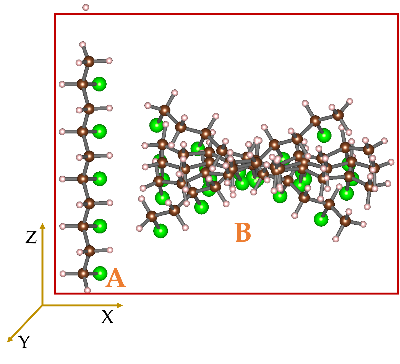

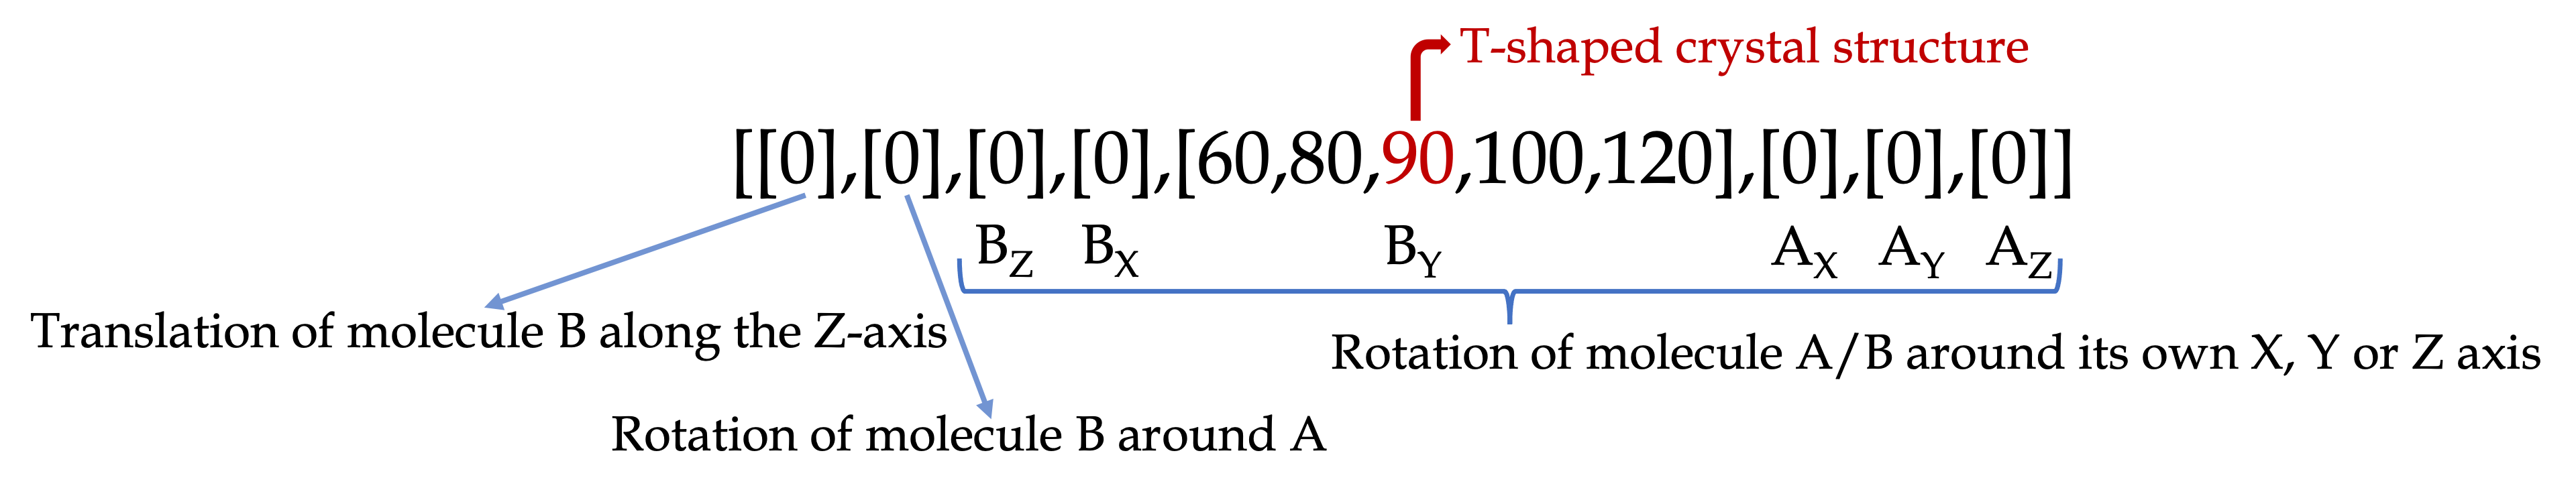

First, the user will generate a pentamer model using $ChainBuilder$. Second, two pentamer chains will be placed in a simulation box and translated/rotated as specified by the user. As  INPUT, the user must provide the repeating unit SMILES, length of an oligomer, and transitional distance or rotational angles in a list of lists format, as shown below.

In [ ]:
# Input SMILES string
repeating_unit = 'C(C([*])Cl)[*]'
length_oligomer = 5
samples = [[0],[0],[0],[0],[60,80,90,100,120],[0],[0],[0]]

# Create a pandas DataFrame
import pandas as pd
input_data = [['pvc',repeating_unit]]
df_smiles = pd.DataFrame(input_data, columns = ['ID', 'smiles'])

# Build chain models
import psp.ChainBuilder as ChB
chain_builder = ChB.Builder(Dataframe=df_smiles, Length=[length_oligomer], Inter_Chain_Dis=0.0)
results = chain_builder.BuildChain()

# Build crystal models
import psp.CrystalBuilder as CrB
vasp_input_list = ['chains/pvc/pvc_N5.vasp']
crystal_builder = CrB.Builder(
    VaspInp_list=vasp_input_list,
    NSamples=samples,
    Polymer=False,
    OutDir='selective_models'
)
results = crystal_builder.BuildCrystal()


                        ---------  PPPPPP       SSSSSS    PPPPPP    ---------                        
                -----------------  PP    PP   SS          PP    PP  -----------------                
        -------------------------  PP    PP   SS          PP    PP  -------------------------        
 --------------------------------  PPPPPP       SSSSS     PPPPPP    -------------------------------- 
        -------------------------  PP                SS   PP        -------------------------        
                -----------------  PP                SS   PP        -----------------                
                        ---------  PP          SSSSSS     PP        ---------                        
 --------------------------------------------------------------------------------------------------- 
          ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **          
                        Polymer Structure Predictor (PSP) version =  1.0.0        

Building models ...:   0%|          | 0/1 [00:00<?, ?it/s]

 Chain model building started for pvc ...


Building models ...: 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]


 Chain model building completed for pvc .

 Polymer chain building completed.

 ----------------------------------------------- OUTPUT -------------------------------------------- 
|    | ID   | Result   |
|---:|:-----|:---------|
|  1 | pvc  | SUCCESS  |

 Total run time (minutes):  0.0
 ------------------------------------- PSP TERMINATED NORMALLY ------------------------------------- 

                        ---------  PPPPPP       SSSSSS    PPPPPP    ---------                        
                -----------------  PP    PP   SS          PP    PP  -----------------                
        -------------------------  PP    PP   SS          PP    PP  -------------------------        
 --------------------------------  PPPPPP       SSSSS     PPPPPP    -------------------------------- 
        -------------------------  PP                SS   PP        -------------------------        
                -----------------  PP                SS   PP        -----------------             

Building models ...:   0%|          | 0/1 [00:00<?, ?it/s]

 Crystal model building started for pvc_N5 ...



Building models ...: 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

 Crystal model building completed for pvc_N5

 Crystal model building completed.

 ----------------------------------------------- OUTPUT -------------------------------------------- 
|    | ID     |   Count |   radius |
|---:|:-------|--------:|---------:|
|  1 | pvc_N5 |       5 |  6.54381 |

 Total run time (minutes):  0.01
 ------------------------------------- PSP TERMINATED NORMALLY ------------------------------------- 


Crystal models are stored at *selective_models/PVC_N5/*. As can be seen, there are only five models generated, including a T-shape model (*cryst_out-3.vasp*).

In [ ]:
!ls selective_models/pvc_N5/
visualize3D("selective_models/pvc_N5/cryst_out-3.vasp")

cryst_out-1.vasp  cryst_out-3.vasp  cryst_out-5.vasp
cryst_out-2.vasp  cryst_out-4.vasp
1 molecule converted
model_wCell.cif


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Additional information
$CrystalBuilder$ allows users to modify a number of parameters/keywords in order to create desired crystal models. It can build crystal models of multiple molecules/polymers at the same time by providing $CrystalBuilder$ with a list of chain models.

 $CrystalBuilder$ supports the following **parameters** or **keywords**:
- $\verb=VASPInp_list=$ **:** A list of names of oligomer or polymer chains with their PATH. Make sure that $CrystalBuilder$ can find them in the specified locations.
- $\verb=NSamples=$ [*default value=5*] **:** It determines the number of crystal models to be generated.  It can be an integer or a list of lists. If it is an integer, it will be considered as the number of samples for each degree of freedom. For polymer and small molecules, the total number of crystal models will be $\verb=NSamples=^3$ and $\verb=NSamples=^8$, respectively. A specific set of crystal models can be generated by specifying translation distance and rotation angles in a list of lists.
- $\verb=InputRadius=$ [*default option=`auto'*] **:** This key defines the distance between $z$-axes of two chains, which is used to rotate one chain with respect to another fixed one. If $\verb=InputRadius=$=`auto', $CrystalBuilder$ will calculate an approximate distance by considering $x$ and $y$ coordinates of the input geometry and the minimum atomic distance defined by $\verb=MinAtomicDis=$. To define your own value, change this to a float or an integer (in $Å$).
- $\verb=MinAtomicDis=$ [*default value=2.0*] **:** This key defines the minimum distance between any two atoms of two chains in $Å$. Note that this key works if $\verb=InputRadius=$=`auto'.
- $\verb=Polymer=$ [*default option=`True'*]: In the case of polymers, fixing the position of the first polymer, the second one is moved in three distinct ways, i.e., (1) translated along the $z$-axis, (2) rotated around its own axis, (3) rotated around the first polymer chain. However, for oligomers, more degrees of freedom must be considered to capture every possible crystal models, which can be activated by setting $\verb=Polymer=$=`False'.
- $\verb=Optimize=$ [*default option=`False'*] **:** PSP generated crystal models can be further optimized using UFF and conjugate gradient method by setting $\verb=Optimize=$=`True'.
- $\verb=NumCandidate=$ [*default value=50*] **:** This keyword is activated when $\verb=Optimize=$=`True', determining the number of crystal models selected based on the total energy computed by UFF. Note that high-energy models are discarded.
- $\verb=OutDir=$ [*default option=`crystals'*]: This key allows users to define a directory where they want to store output files.

The code snippet below demonstrates how to build crystal models from a set of repeated unit SMILES strings (provided as a CSV file).

In [ ]:
cat crystal_model.py

import pandas as pd
import glob
import psp.ChainBuilder as ChB
import psp.CrystalBuilder as CrB

df_smiles = pd.read_csv("input_chain.csv")

chain_builder = ChB.Builder(
    Dataframe=df_smiles,
    ID_col="PID",
    SMILES_col="smiles_polymer",
    NumConf=1,
    Length=['n',5],
    Steps=20,
    Substeps=20,
    Method="SA",
    NCores=1,
    OutDir='chains',
    Tol_ChainCorr=50,
)
results = chain_builder.BuildChain()

ID = "PVC"
vasp_input_list = glob.glob("chains/" + ID + "/" + "*.vasp")
crystal_builder = CrB.Builder(
    VaspInp_list=vasp_input_list,
    NSamples=10,
    InputRadius="auto",
    MinAtomicDis=2.0,
    Polymer=True,
    Optimize=False,
    NCores=1,
)
results = crystal_builder.BuildCrystal()


## AmorphousBuilder
$AmorphousBuilder$ builds models of amorphous organic materials. It accepts SMILES strings for both molecules and polymers. In this section, we'll show you how to build a variety of amorphous structures using SMILES strings as INPUT.


Let's go to the *polymer_models/AmorphousBuilder* directory.

In [ ]:
%cd /content/polymer_models/AmorphousBuilder/


/content/polymer_models/AmorphousBuilder


###**Example 1**: Amorphous structure of a polymer
Users can build an amorphous model for polymers by providing repeated unit SMILES, length of an oligomer, and number molecules to be included in the simulation box. The below example shows a toy amorphous model for polyethylene, where 10 pentaethylene molecules are packed in a cubic box.

In [ ]:
# Input SMILES string
repeating_unit_PE = '[*]CC[*]'
Length_PE = 5
Number_molecule_PE = 10

# Create a pandas DataFrame
import pandas as pd
input_data = [['PE', repeating_unit_PE, Length_PE, Number_molecule_PE, 1, False]]
input_df = pd.DataFrame(input_data, columns = ['ID', 'smiles', 'Len', 'Num', 'NumConf', 'Loop'])

import psp.AmorphousBuilder as ab
amor = ab.Builder(input_df, density=0.65, box_type='c', OutDir='amor_model')
amor.Build()


                        ---------  PPPPPP       SSSSSS    PPPPPP    ---------                        
                -----------------  PP    PP   SS          PP    PP  -----------------                
        -------------------------  PP    PP   SS          PP    PP  -------------------------        
 --------------------------------  PPPPPP       SSSSS     PPPPPP    -------------------------------- 
        -------------------------  PP                SS   PP        -------------------------        
                -----------------  PP                SS   PP        -----------------                
                        ---------  PP          SSSSSS     PP        ---------                        
 --------------------------------------------------------------------------------------------------- 
          ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **          
                        Polymer Structure Predictor (PSP) version =  1.0.0        

Building models ...: 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]



 3D model building completed.

|    | ID   | Result   | SMILES         |
|---:|:-----|:---------|:---------------|
|  1 | PE   | SUCCESS  | ['CCCCCCCCCC'] |

 3D model building time (minutes):  0.0



Building models ...: 100%|██████████| 1/1 [00:22<00:00, 22.24s/it]


 Amorphous model building completed.

 Total run time (minutes):  0.38
 ------------------------------------- PSP TERMINATED NORMALLY ------------------------------------- 


PSP terminated normally. All models are stored in *amor_model/* directory. Output files are in POSCAR ($.vasp$) and LAMMPS data ($.data$) formats. Individual models are stored in *amor_model/molecules/* and PACKMOL output files are saved in *amor_model/packmol/* directory.

In [ ]:
ls amor_model

amor_model.data  amor_model.vasp  molecules/  packmol/


Let's take a look at the amorphous model.

In [ ]:
visualize3D("amor_model/amor_model.vasp")

1 molecule converted
model_wCell.cif


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

#### Force field parameter file
PSP also allows generating a GAFF2 FF parameter file for the amorphous model. It can use either AmberTools (antechamber) or PySIMM for atom typing.

In [ ]:
amor.get_gaff2(output_fname='amor_gaff2.lmps', atom_typing='antechamber')


Generating GAFF2 parameter file ...

Pysimm working on amor_model/molecules/PE_N5_C1.cml
(debug) PySIMM: reading file
Antechamber working on amor_model/molecules/PE_N5_C1.mol2
adding gasteiger charges
charges converged after 14 iterations

GAFF2 parameter file generated.


For the amorphous model, a GAFF2 parameter file is now generated: *amor_gaff2.lmps*

In [ ]:
ls amor_model

amor_gaff2.lmps  amor_model.vasp  packmol/
amor_model.data  molecules/       pysimm/


###**Example 2**: Build amorphous models with O2 gas
Next, we'll learn how to incorporate multiple types of oligomers/molecules into an amorphous model. For example, oxygen molecules can be incorporated into the polyethylene system. As shown in the code snippet below, we must supply the SMILES strings and the number of molecules for both polyethylene and oxygen to be included in an amorphous model. 

In [ ]:
# Input SMILES string
repeating_unit_PE = '[*]CC[*]'
Length_PE = 5
Number_molecule_PE = 4

Oxygen = 'O=O'
Number_molecule_Oxy = 10


# Create a pandas DataFrame
import pandas as pd
input_data = [['PE', repeating_unit_PE, Length_PE, Number_molecule_PE, 1, False], ['O2', Oxygen, 1, Number_molecule_Oxy, 1, False]]
input_df = pd.DataFrame(input_data, columns = ['ID', 'smiles', 'Len', 'Num', 'NumConf', 'Loop'])

import psp.AmorphousBuilder as ab
amor = ab.Builder(input_df, density=0.85, box_type='c', OutDir='amor_model2')
amor.Build()


                        ---------  PPPPPP       SSSSSS    PPPPPP    ---------                        
                -----------------  PP    PP   SS          PP    PP  -----------------                
        -------------------------  PP    PP   SS          PP    PP  -------------------------        
 --------------------------------  PPPPPP       SSSSS     PPPPPP    -------------------------------- 
        -------------------------  PP                SS   PP        -------------------------        
                -----------------  PP                SS   PP        -----------------                
                        ---------  PP          SSSSSS     PP        ---------                        
 --------------------------------------------------------------------------------------------------- 
          ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **          
                        Polymer Structure Predictor (PSP) version =  1.0.0        

Building models ...: 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]



 3D model building completed.

|    | ID   | Result   | SMILES         |
|---:|:-----|:---------|:---------------|
|  1 | PE   | SUCCESS  | ['CCCCCCCCCC'] |

 3D model building time (minutes):  0.0

  MoleculeBuilder  started...
 ----------------------------------------------- INPUT --------------------------------------------- 
|    | ID   | smiles   |   Len |   Num |   NumConf |   Loop |
|---:|:-----|:---------|------:|------:|----------:|-------:|
|  1 | O2   | O=O      |     1 |    10 |         1 |      0 |

 Additional information:  
 Length of oligomers:  [1] 
 Number of conformers:  1 
 Loop model:  False 
 Run short MD simulation:  False 
 Generate OPLS parameter file:  False 
 Intermolecular distance in POSCAR:  6 
 Number of cores:  All 
 Output Directory:  amor_model2/molecules/ 


 3D model building started...



Building models ...: 100%|██████████| 1/1 [00:00<00:00, 43.36it/s]



 3D model building completed.

|    | ID   | Result   | SMILES   |
|---:|:-----|:---------|:---------|
|  1 | O2   | SUCCESS  | ['O=O']  |

 3D model building time (minutes):  0.0



Building models ...: 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]


 Amorphous model building completed.

 Total run time (minutes):  0.02
 ------------------------------------- PSP TERMINATED NORMALLY ------------------------------------- 


PSP normally terminated. Let's take a look at the amorphous model we created.

In [ ]:
visualize3D("amor_model2/amor_model.vasp")

1 molecule converted
model_wCell.cif


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Additional information
$AmorphousBuilder$ allows altering keywords or parameters to fine-tune an amorphous model. A CSV file may be used to supply SMILES strings and other information for all polymers/molecules that will be included in an amorphous model.

$AmorphousBuilder$ supports the following **parameters** or **keywords**:
- $\verb=Dataframe=$ **:** A pandas Dataframe that contains polymer IDs, SMILES strings representing repeating and endcap units, length of oligomers, number of oligomers/molecules, chain type (linear or loop), etc.
- $\verb=ID_col=$ [*default option=`ID'*] **:** Column name for molecule/oligomer IDs in the Dataframe.
- $\verb=SMILES_col=$ [*default option=`smiles'*] **:** Column name for polymer SMILES strings (repeating unit) in the Dataframe.
- $\verb=NumMole=$ [*default option=`Num'*] **:** Column name for the number of each molecule in the Dataframe.
- $\verb=Length=$ [*default option=`Len'*] **:** Column name for the length of each oligomer in the Dataframe.
- $\verb=LeftCap=$ [*default option=`LeftCap'*] **:** Column name for the SMILES string of left cap molecular fragment in the Dataframe.
- $\verb=RightCap=$ [*default option=`RightCap'*] **:** Column name for the SMILES string of right cap molecular fragment in the Dataframe.
- $\verb=Loop=$ [*default option=`Loop'*] **:** Column name for selecting linear or circular chains.
- $\verb=OutFile=$ [*default option=`amor_model'*]: The names of the output files exported in POSCAR and LAMMPS data formats. 
- $\verb=OutDir=$ [*default option=`amorphous_models'*] **:** The output directory, which contains all files, including POSCAR and LAMMPS data files.
- $\verb=density=$ [*default value=0.65 g/cm$^3$*] **:** The density of a simulation box.
- $\verb=tol_dis=$ [*default value=2.0*] **:** The minimum distance between any two molecules in a simulation box.
- $\verb=box_type=$ [*default option=`c'*] **:** The shape of a simulation box. Here, *`c'* and *`r'* denote cubic and rectangular, respectively.
- $\verb=incr_per=$ [*default value=0.4*] **:** If the shape of a box is rectangular, $\verb=incr_per=$ determines the length of z axis (l$_{z}$). l$_{z}$ = Volume$^{1/3}$ + $\verb=incr_per=$ $\times$ Volume$^{1/3}$.
- $\verb=box_size=$ [No default value]: It is a list of six numbers that offers an alternative method of explicitly defining the box size. [*xmin, xmax, ymin, ymax, zmin, zmax*]

A sample CSV file containing data for three oligomers is provided below. Users can add more molecules/oligomers to the amorphous model by appending new raws to the list.

In [ ]:
cat input_amor.csv

ID,smiles,Len,Num,NumConf,Loop
PVC3,C(C([*])Cl)[*],3,8,2,False
PVC5,C(C([*])Cl)[*],5,4,2,False
cc5,[*]CC[*],5,8,2,False


Below is an example of a code snippet required for $AmorphousBuilder$. The definitions of keywords and parameters are provided above.

In [ ]:
cat amor_model.py

import pandas as pd
import psp.AmorphousBuilder as ab

input_df = pd.read_csv("input_amor.csv")
amor = ab.Builder(
    input_df,
    ID_col="ID",
    SMILES_col="smiles",
    OutDir='amor_model',
    Length='Len',
    NumConf='NumConf',
    NumModel=1,
    LeftCap = "LeftCap",
    RightCap = "RightCap",
    Loop='Loop',
    density=0.85,
    box_type='c',
)
amor.Build()


###**Example 3**: Build an amorphous model that includes multiple polymers/molecules
The code snippet below will read all of the relevant information about molecules/polymers from a CSV file (*input_amor.csv*) and then generate an amorphous model. 

In [ ]:
import pandas as pd
import psp.AmorphousBuilder as ab

input_df = pd.read_csv("input_amor.csv")
amor = ab.Builder(
    input_df,
    ID_col="ID",
    SMILES_col="smiles",
    OutDir='amor_model',
    Length='Len',
    NumConf='NumConf',
    NumModel=1,
    LeftCap = "LeftCap",
    RightCap = "RightCap",
    Loop='Loop',
    density=0.85,
    box_type='c',
)
amor.Build()


                        ---------  PPPPPP       SSSSSS    PPPPPP    ---------                        
                -----------------  PP    PP   SS          PP    PP  -----------------                
        -------------------------  PP    PP   SS          PP    PP  -------------------------        
 --------------------------------  PPPPPP       SSSSS     PPPPPP    -------------------------------- 
        -------------------------  PP                SS   PP        -------------------------        
                -----------------  PP                SS   PP        -----------------                
                        ---------  PP          SSSSSS     PP        ---------                        
 --------------------------------------------------------------------------------------------------- 
          ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** **          
                        Polymer Structure Predictor (PSP) version =  1.0.0        

Building models ...: 100%|██████████| 1/1 [00:00<00:00,  7.34it/s]



 3D model building completed.

|    | ID   | Result   | SMILES               |
|---:|:-----|:---------|:---------------------|
|  1 | PVC3 | SUCCESS  | ['CC(Cl)CC(Cl)CCCl'] |

 3D model building time (minutes):  0.0

  MoleculeBuilder  started...
 ----------------------------------------------- INPUT --------------------------------------------- 
|    | ID   | smiles         |   Len |   Num |   NumConf |   Loop |
|---:|:-----|:---------------|------:|------:|----------:|-------:|
|  1 | PVC5 | C(C([*])Cl)[*] |     5 |     4 |         2 |      0 |

 Additional information:  
 Length of oligomers:  [5] 
 Number of conformers:  2 
 Loop model:  False 
 Run short MD simulation:  False 
 Generate OPLS parameter file:  False 
 Intermolecular distance in POSCAR:  6 
 Number of cores:  All 
 Output Directory:  amor_model/molecules/ 


 3D model building started...



Building models ...: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]



 3D model building completed.

|    | ID   | Result   | SMILES                           |
|---:|:-----|:---------|:---------------------------------|
|  1 | PVC5 | SUCCESS  | ['CC(Cl)CC(Cl)CC(Cl)CC(Cl)CCCl'] |

 3D model building time (minutes):  0.0

  MoleculeBuilder  started...
 ----------------------------------------------- INPUT --------------------------------------------- 
|    | ID   | smiles   |   Len |   Num |   NumConf |   Loop |
|---:|:-----|:---------|------:|------:|----------:|-------:|
|  1 | cc5  | [*]CC[*] |     5 |     8 |         2 |      0 |

 Additional information:  
 Length of oligomers:  [5] 
 Number of conformers:  2 
 Loop model:  False 
 Run short MD simulation:  False 
 Generate OPLS parameter file:  False 
 Intermolecular distance in POSCAR:  6 
 Number of cores:  All 
 Output Directory:  amor_model/molecules/ 


 3D model building started...



Building models ...: 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]



 3D model building completed.

|    | ID   | Result   | SMILES         |
|---:|:-----|:---------|:---------------|
|  1 | cc5  | SUCCESS  | ['CCCCCCCCCC'] |

 3D model building time (minutes):  0.0



Building models ...: 100%|██████████| 1/1 [00:01<00:00,  1.55s/it]


 Amorphous model building completed.

 Total run time (minutes):  0.04
 ------------------------------------- PSP TERMINATED NORMALLY ------------------------------------- 


Let's take a look at the amorphous model.

In [ ]:
visualize3D("amor_model/amor_model.vasp")

1 molecule converted
model_wCell.cif


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# References and further reading

- Harikrishna Sahu, Huan Tran, Kuan-Hsuan Shen, Joseph H. Montoya, Rampi Ramprasad, *PSP: A python toolkit for predicting 3D models of polymers*, J. Chem. Theory Comput., **2022**. DOI: 10.1021/acs.jctc.2c00022
- User Manual: https://github.com/Ramprasad-Group/PSP/blob/master/documentation/PSP_user_manual.pdf
- https://github.com/Ramprasad-Group/PSP